In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

See [here for inflation factor](https://www.census.gov/programs-surveys/acs/guidance/comparing-acs-data/2016.html) to compare ACS 2016 to Census 2000 income

In [2]:
fields = []

# Gross Rent as a Percentage of Household Income in the Past 12 Months
num_range = [str(n) for n in range(1,12)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    fields.append('A.AF9FE0{}'.format(n))

# Household Income by Gross Rent as a Percentage of Household Income in the Past 12 Months
num_range = [str(n) for n in range(1,65)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    fields.append('A.AF9IE0{}'.format(n))
    
# Gross Rent as a Percentage of Household Income in 1999
num_range = [str(n) for n in range(1,11)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    fields.append('D.GBW0{}'.format(n))

# Household Income by Gross Rent as a Percentage of Household Income in the Past 12 Months
num_range = [str(n) for n in range(1,43)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    fields.append('D.GB30{}'.format(n))

    
print fields

['A.AF9FE001', 'A.AF9FE002', 'A.AF9FE003', 'A.AF9FE004', 'A.AF9FE005', 'A.AF9FE006', 'A.AF9FE007', 'A.AF9FE008', 'A.AF9FE009', 'A.AF9FE010', 'A.AF9FE011', 'A.AF9IE001', 'A.AF9IE002', 'A.AF9IE003', 'A.AF9IE004', 'A.AF9IE005', 'A.AF9IE006', 'A.AF9IE007', 'A.AF9IE008', 'A.AF9IE009', 'A.AF9IE010', 'A.AF9IE011', 'A.AF9IE012', 'A.AF9IE013', 'A.AF9IE014', 'A.AF9IE015', 'A.AF9IE016', 'A.AF9IE017', 'A.AF9IE018', 'A.AF9IE019', 'A.AF9IE020', 'A.AF9IE021', 'A.AF9IE022', 'A.AF9IE023', 'A.AF9IE024', 'A.AF9IE025', 'A.AF9IE026', 'A.AF9IE027', 'A.AF9IE028', 'A.AF9IE029', 'A.AF9IE030', 'A.AF9IE031', 'A.AF9IE032', 'A.AF9IE033', 'A.AF9IE034', 'A.AF9IE035', 'A.AF9IE036', 'A.AF9IE037', 'A.AF9IE038', 'A.AF9IE039', 'A.AF9IE040', 'A.AF9IE041', 'A.AF9IE042', 'A.AF9IE043', 'A.AF9IE044', 'A.AF9IE045', 'A.AF9IE046', 'A.AF9IE047', 'A.AF9IE048', 'A.AF9IE049', 'A.AF9IE050', 'A.AF9IE051', 'A.AF9IE052', 'A.AF9IE053', 'A.AF9IE054', 'A.AF9IE055', 'A.AF9IE056', 'A.AF9IE057', 'A.AF9IE058', 'A.AF9IE059', 'A.AF9IE060', 'A.AF

In [3]:
db = "/home/eric/Documents/franklin/cost_burden/generated_data/cost_burden.sqlite"
con = sql.connect(db)
con.text_factory=str


qry = '''
SELECT A.GISJOIN , A.PLACE,
A.AF2LE001 AS pop16,
C.FL5001 AS pop00,
B.AGQ1E003 AS med_renter_inc_16,
A.AF89E001 AS med_gross_rent_16,
D.GED002 * 1.4415372 AS med_renter_inc_00,
D.GBO001 * 1.4415372 AS med_gross_rent_00,
{}
FROM nhgis_20165_place_ds225 AS A JOIN nhgis_20165_place_ds226 AS B
    ON A.GISJOIN = B.GISJOIN 
JOIN nhgis_2000_place_ds146 AS C 
    ON A.GISJOIN = C.GISJOIN
JOIN nhgis_2000_place_ds151 AS D
    ON A.GISJOIN = D.GISJOIN
WHERE A.STATEA NOT IN ('72', '02', '15')
AND B.AGQ1M003 <> '' AND A.AF89E001 <> ''
AND C.FL5001 > 50000
'''.format(', '.join(map(str, fields)))

df = pd.read_sql(qry, con, index_col='GISJOIN')
con.close()

print len(df)
df.head()

646


,PLACE,pop16,pop00,med_renter_inc_16,med_gross_rent_16,med_renter_inc_00,med_gross_rent_00,AF9FE001,AF9FE002,AF9FE003,...,GB3033,GB3034,GB3035,GB3036,GB3037,GB3038,GB3039,GB3040,GB3041,GB3042
GISJOIN,,,,,,,,,,,,,,,,,,,,,
G01007000,Birmingham city,212424,242820,22983,744,26831.331904,642.925591,48528,1384,2912,...,0,0,0,44,656,0,0,0,0,60
G01020104,Decatur city,55419,53929,25987,615,30120.919794,618.419459,8869,505,1108,...,9,0,10,0,167,0,0,0,0,10
G01021184,Dothan city,68066,57737,25376,702,29058.506878,601.121012,10765,376,1031,...,0,0,0,7,159,0,0,0,0,19
G01035896,Hoover city,84100,62742,47216,1000,55773.074268,1026.374486,10499,303,920,...,0,0,0,23,397,0,0,12,0,20
G01037000,Huntsville city,188973,158216,28710,750,34024.602532,713.560914,33041,1381,3365,...,0,8,0,23,547,10,0,0,0,74


In [66]:
df['state'] = df.index.str[:4]
df['state'].head()

GISJOIN
G01007000    G010
G01020104    G010
G01021184    G010
G01035896    G010
G01037000    G010
Name: state, dtype: object

In [4]:
# gen cost burden vars
df['renter_cost_burden_16'] = 0
num = 0
denom = 0
num_range = [str(n) for n in range(7,11)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    num += df['AF9FE0{}'.format(n)]  
    
df['renter_cost_burden_16'] = num * 1.0 / df['AF9FE001'] * 100


# 2000
df['renter_cost_burden_00'] = 0
num = 0
denom = 0
num_range = [str(n) for n in range(6,10)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    num += df['GBW0{}'.format(n)]  
    
num_range = [str(n) for n in range(1,11)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    denom += df['GBW0{}'.format(n)]  
    
df['renter_cost_burden_00'] = num * 1.0 / denom * 100

In [5]:
# calc pop change in each decade
df['ppctchg_0016'] = ( df['pop16'] - df['pop00'] ) * 1.0 / df['pop00'] * 100

# growth categories 2000-2010
df['growth_cat'] = 0
df.loc[df['ppctchg_0016'] >= 5, 'growth_cat'] = 'growing'
df.loc[(df['ppctchg_0016'] < 5) & (df['ppctchg_0016'] >= 0 ), 'growth_cat'] = 'stable'
df.loc[df['ppctchg_0016'] < 0, 'growth_cat'] = 'shrinking'

df.groupby('growth_cat').size()

growth_cat
growing      402
shrinking    115
stable       129
dtype: int64

In [6]:
# create index values where 100 = 2000 val
cols = ['med_renter_inc', 'med_gross_rent']
for c in cols:
    df['{}_00_idx'.format(c)] = df['{}_00'.format(c)] / df['{}_00'.format(c)] * 100

for c in cols:
    df['{}_16_idx'.format(c)] = df['{}_16'.format(c)] / df['{}_00'.format(c)] * 100

(0, 43745.534392579997)

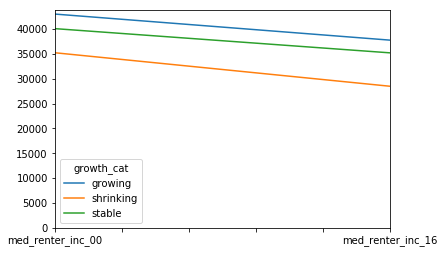

In [7]:
grouped = df.groupby('growth_cat')
cols = ['med_renter_inc_00', 'med_renter_inc_16']
ax=grouped[cols].median().transpose().plot()
ax.set_ylim(0)

(0, 1053.0064187400001)

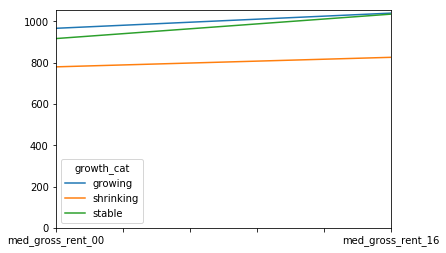

In [8]:
grouped = df.groupby('growth_cat')
cols = ['med_gross_rent_00', 'med_gross_rent_16']
ax=grouped[cols].median().transpose().plot()
ax.set_ylim(0)

(80, 115)

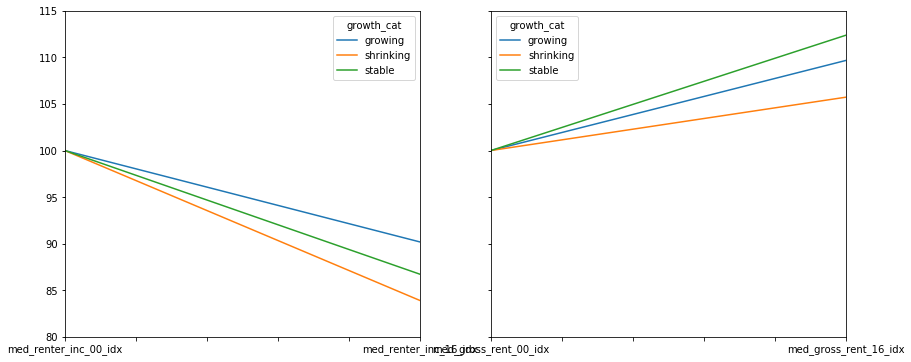

In [9]:
w = 14
h = 6
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(w,h))

cols = ['med_renter_inc_00_idx', 'med_renter_inc_16_idx']
grouped[cols].median().transpose().plot(ax=ax1)

cols = ['med_gross_rent_00_idx', 'med_gross_rent_16_idx']
ax=grouped[cols].median().transpose().plot(ax=ax2)


ax1.set_ylim(80, 115)

In [10]:
# calc diff for each county
df['renter_inc_diff'] = df['med_renter_inc_16_idx'] - 100
df['gross_rent_diff'] = df['med_gross_rent_16_idx'] - 100

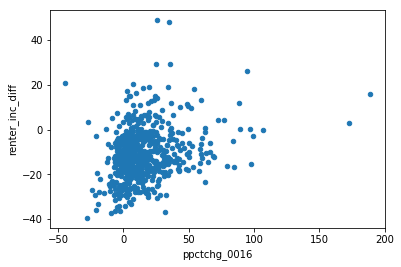

In [11]:
df.plot.scatter('ppctchg_0016', 'renter_inc_diff')

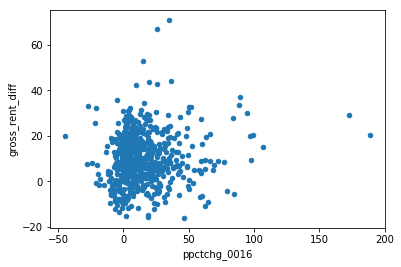

In [12]:
df.plot.scatter('ppctchg_0016', 'gross_rent_diff')

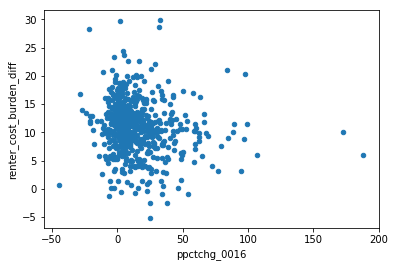

In [13]:
df['renter_cost_burden_diff'] = df['renter_cost_burden_16'] - df['renter_cost_burden_00']
df.plot.scatter('ppctchg_0016', 'renter_cost_burden_diff')

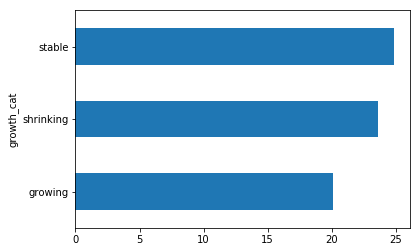

In [14]:
# plot gap between rent increase and income decrease
df['idx_gap'] = df['med_gross_rent_16_idx'] - df['med_renter_inc_16_idx']
df.groupby('growth_cat')['idx_gap'].median().transpose().plot(kind='barh')

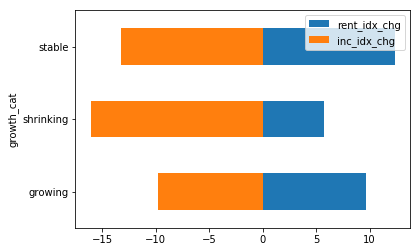

In [15]:
df['rent_idx_chg'] = df['med_gross_rent_16_idx'] - df['med_renter_inc_00_idx']
df['inc_idx_chg'] = df['med_renter_inc_16_idx'] - df['med_renter_inc_00_idx']
cols = ['rent_idx_chg', 'inc_idx_chg']
grouped[cols].median().plot(kind='barh', stacked=True)

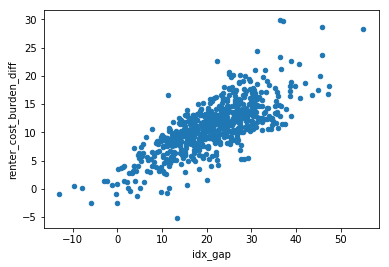

In [16]:
df.plot.scatter('idx_gap', 'renter_cost_burden_diff')

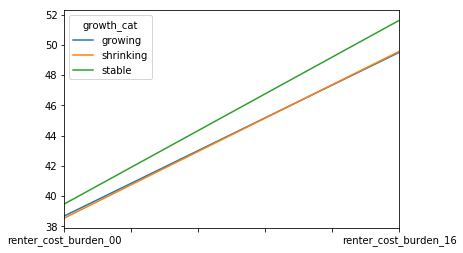

In [17]:
cols = ['renter_cost_burden_00', 'renter_cost_burden_16']
grouped[cols].median().transpose().plot()

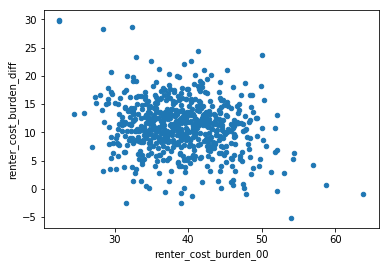

In [18]:
df.plot.scatter('renter_cost_burden_00', 'renter_cost_burden_diff')

In [19]:
import statsmodels.formula.api as smf

In [20]:
mod = smf.ols(formula='renter_cost_burden_diff ~ idx_gap + renter_cost_burden_00 + np.log(pop00)', data=df)
res = mod.fit(cov_type='HC3')
print(res.summary())

                               OLS Regression Results                              
Dep. Variable:     renter_cost_burden_diff   R-squared:                       0.624
Model:                                 OLS   Adj. R-squared:                  0.622
Method:                      Least Squares   F-statistic:                     276.9
Date:                     Wed, 06 Feb 2019   Prob (F-statistic):          2.73e-115
Time:                             11:33:43   Log-Likelihood:                -1597.8
No. Observations:                      646   AIC:                             3204.
Df Residuals:                          642   BIC:                             3222.
Df Model:                                3                                         
Covariance Type:                       HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

/home/eric/anaconda2/envs/geo/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## decompose income and rent gap

Plot changes in median gross rent and median renter income index values (2000 = 100). Distance between cap of each bar is the gap between change in income and rent. I expect the growing affordability gap in shrinking cities is more a function of declining income relative to rent, while this gap in growing places is likely driven by higher rents. 

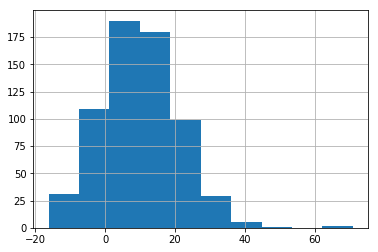

In [21]:
df['rent_idx_chg'].hist()

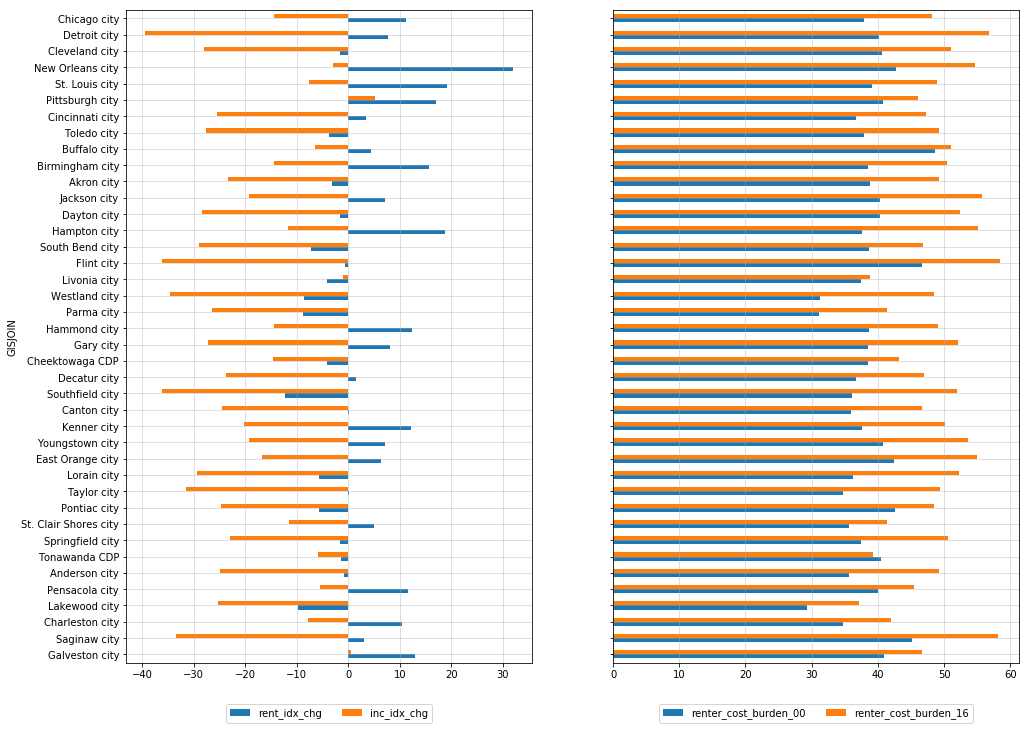

In [22]:
# plot growth in affordability gap for largest shrinking cities
w = 16
h = 12
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(w,h))

subset = df.loc[(df['ppctchg_0016']<-5)].sort_values('pop16', ascending=False).head(40)
subset = subset.iloc[::-1]

cols = ['rent_idx_chg', 'inc_idx_chg']
subset[cols].plot(kind='barh',ax=ax1)
ax1.set_yticklabels(subset['PLACE'])
ax1.grid(zorder=0, alpha=0.5)

cols = ['renter_cost_burden_00', 'renter_cost_burden_16']
# cols = ['idx_gap']
subset[cols].plot(kind='barh',ax=ax2)
ax2.set_yticklabels(subset['PLACE'])
ax2.grid(zorder=0, alpha=0.5)

ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)

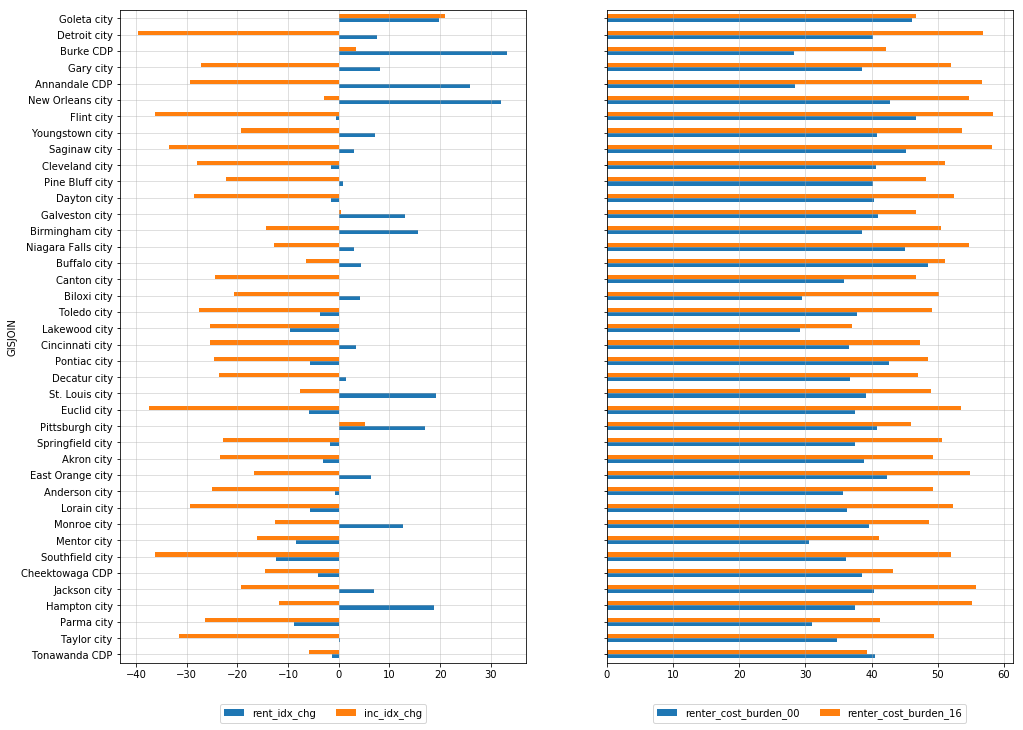

In [23]:
# plot for places with largest pct pop loss
w = 16
h = 12
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(w,h))

subset = df.loc[(df['ppctchg_0016']<-5)].sort_values('ppctchg_0016', ascending=True).head(40)
subset = subset.iloc[::-1]

cols = ['rent_idx_chg', 'inc_idx_chg']
subset[cols].plot(kind='barh',ax=ax1)
ax1.set_yticklabels(subset['PLACE'])
ax1.grid(zorder=0, alpha=0.5)

cols = ['renter_cost_burden_00', 'renter_cost_burden_16']
# cols = ['idx_gap']
subset[cols].plot(kind='barh',ax=ax2)
ax2.set_yticklabels(subset['PLACE'])
ax2.grid(zorder=0, alpha=0.5)

ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)

In [24]:
# places with largest pct pop loss
df.sort_values('ppctchg_0016', ascending=True)[['PLACE', 'pop00', 'ppctchg_0016']].head(20)

,PLACE,pop00,ppctchg_0016
GISJOIN,,,
G06030378,Goleta city,55204,-44.440620
G26022000,Detroit city,951270,-28.154677
G51011464,Burke CDP,57737,-26.754075
G18027000,Gary city,102746,-24.222841
G51001912,Annandale CDP,54994,-21.522348
G22055000,New Orleans city,484674,-20.993905
G26029000,Flint city,124943,-20.829498
G39088000,Youngstown city,82026,-20.560554
G26070520,Saginaw city,61799,-19.267302


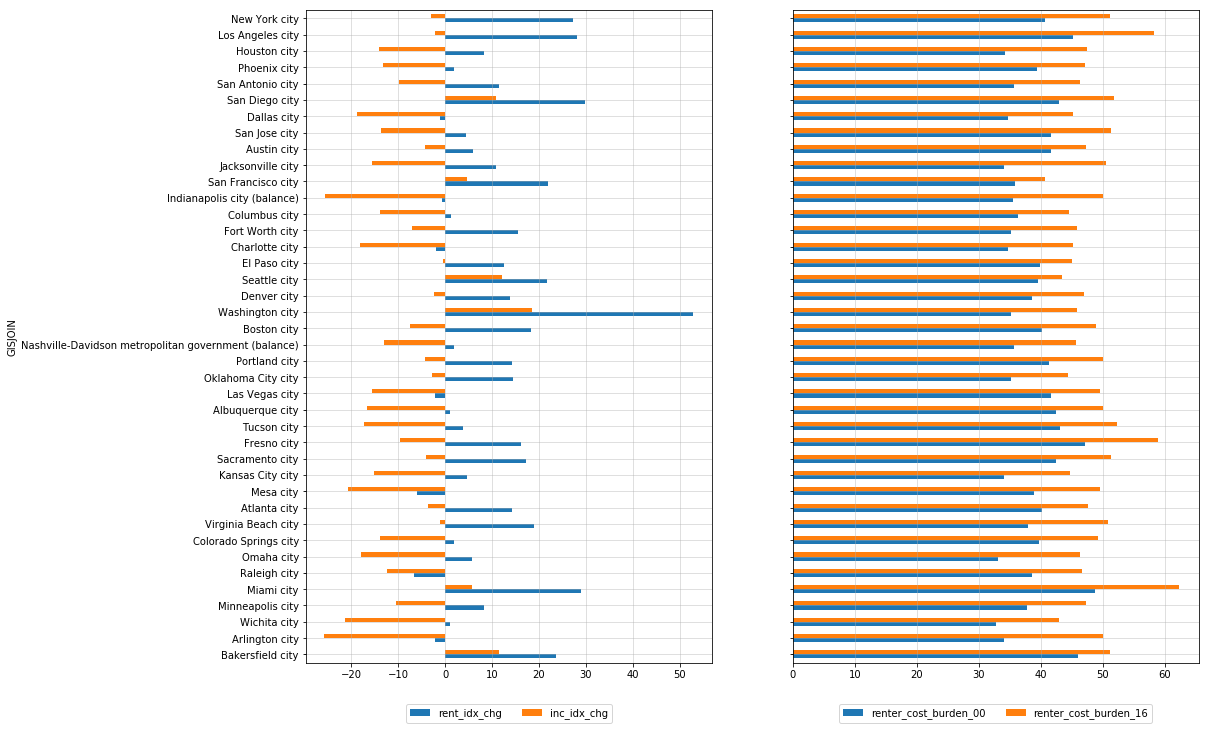

In [25]:
# plot for largest growing places
w = 16
h = 12
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(w,h))

subset = df.loc[(df['ppctchg_0016']>5)].sort_values('pop16', ascending=False).head(40)
subset = subset.iloc[::-1]

cols = ['rent_idx_chg', 'inc_idx_chg']
subset[cols].plot(kind='barh',ax=ax1)
ax1.set_yticklabels(subset['PLACE'])
ax1.grid(zorder=0, alpha=0.5)

cols = ['renter_cost_burden_00', 'renter_cost_burden_16']
# cols = ['idx_gap']
subset[cols].plot(kind='barh',ax=ax2)
ax2.set_yticklabels(subset['PLACE'])
ax2.grid(zorder=0, alpha=0.5)

ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)

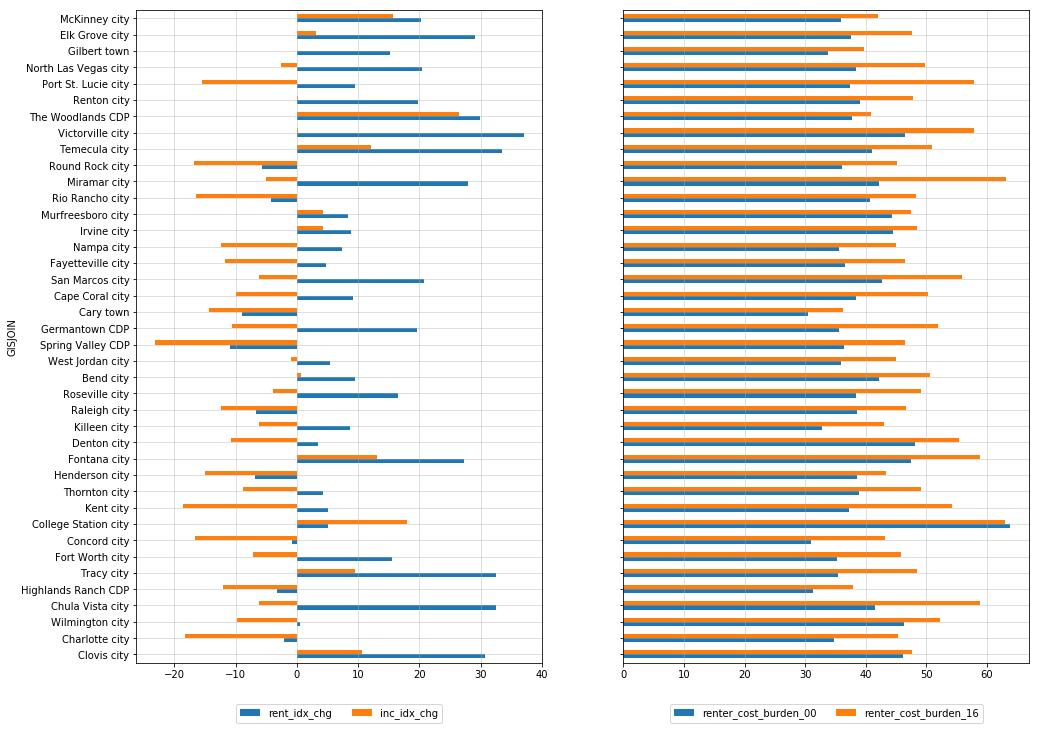

In [26]:
# plot for growing places with largest pct pop increases
w = 16
h = 12
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(w,h))

subset = df.loc[(df['ppctchg_0016']>5)].sort_values('ppctchg_0016', ascending=False).head(40)
subset = subset.iloc[::-1]

cols = ['rent_idx_chg', 'inc_idx_chg']
subset[cols].plot(kind='barh',ax=ax1)
ax1.set_yticklabels(subset['PLACE'])
ax1.grid(zorder=0, alpha=0.5)

cols = ['renter_cost_burden_00', 'renter_cost_burden_16']
# cols = ['idx_gap']
subset[cols].plot(kind='barh',ax=ax2)
ax2.set_yticklabels(subset['PLACE'])
ax2.grid(zorder=0, alpha=0.5)

ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# models 

In [27]:
loss = df.loc[df['ppctchg_0016']<0]
loss = loss[loss['PLACE']!='Goleta city']
len(loss)

114

In [28]:
growth = df.loc[df['ppctchg_0016']>=0]
len(growth)

531

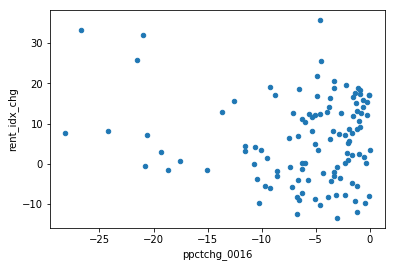

In [29]:
loss.plot.scatter('ppctchg_0016', 'rent_idx_chg')

In [30]:
df.loc[df['ppctchg_0016']<-20][['PLACE', 'ppctchg_0016', 'rent_idx_chg']].sort_values('rent_idx_chg', ascending=False)

,PLACE,ppctchg_0016,rent_idx_chg
GISJOIN,,,
G51011464,Burke CDP,-26.754075,33.221363
G22055000,New Orleans city,-20.993905,32.059618
G51001912,Annandale CDP,-21.522348,25.811257
G06030378,Goleta city,-44.440620,19.802456
G18027000,Gary city,-24.222841,8.123148
G26022000,Detroit city,-28.154677,7.624023
G39088000,Youngstown city,-20.560554,7.082973
G26029000,Flint city,-20.829498,-0.607968


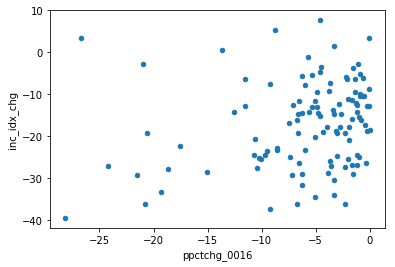

In [31]:
loss.plot.scatter('ppctchg_0016', 'inc_idx_chg')

In [32]:
df.loc[df['ppctchg_0016']<-40]

,PLACE,pop16,pop00,med_renter_inc_16,med_gross_rent_16,med_renter_inc_00,med_gross_rent_00,AF9FE001,AF9FE002,AF9FE003,...,med_renter_inc_00_idx,med_gross_rent_00_idx,med_renter_inc_16_idx,med_gross_rent_16_idx,renter_inc_diff,gross_rent_diff,renter_cost_burden_diff,idx_gap,rent_idx_chg,inc_idx_chg
GISJOIN,,,,,,,,,,,,,,,,,,,,,
G06030378,Goleta city,30671,55204,72560,1708,60006.869024,1425.680291,5051,133,314,...,100.0,100.0,120.91949,119.802456,20.91949,19.802456,0.591946,-1.117034,19.802456,20.91949


In [33]:
results = smf.ols('rent_idx_chg ~ ppctchg_0016 + np.log(pop00) + med_gross_rent_00', data=loss).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:           rent_idx_chg   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     3.104
Date:                Wed, 06 Feb 2019   Prob (F-statistic):             0.0296
Time:                        11:33:46   Log-Likelihood:                -424.43
No. Observations:                 114   AIC:                             856.9
Df Residuals:                     110   BIC:                             867.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -45.6261     17.64

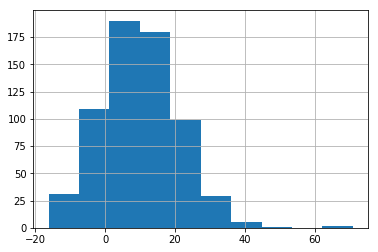

In [34]:
df['rent_idx_chg'].hist()

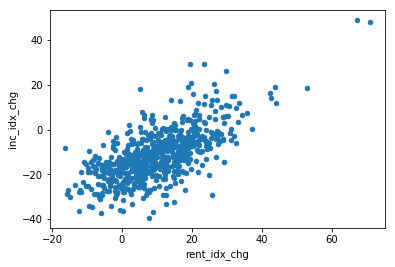

In [39]:
df.plot.scatter('rent_idx_chg', 'inc_idx_chg')

In [41]:
# predict change in renter cost burden in loss places on income falling faster than rent
# construct main IV
df['income_below_rent'] = 0
df.loc[(df['inc_idx_chg'] < 0) & (df['inc_idx_chg'] < df['rent_idx_chg']), 'income_below_rent'] = 1
df.loc[(df['inc_idx_chg'] > 0) & (df['inc_idx_chg'] < df['rent_idx_chg']), 'income_below_rent'] = 2
df.loc[df['ppctchg_0016']<0].groupby('income_below_rent').size()

income_below_rent
0      2
1    107
2      6
dtype: int64

In [42]:
df.loc[df['ppctchg_0016']>0].groupby('income_below_rent').size()

income_below_rent
0      8
1    453
2     70
dtype: int64

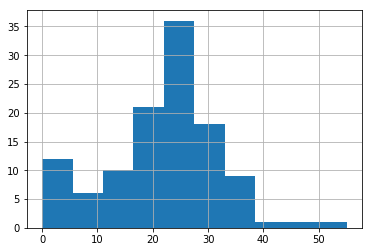

In [56]:
df['income_below_rent_cnt'] = 0
df.loc[(df['inc_idx_chg'] < 0) & (df['inc_idx_chg'] < df['rent_idx_chg']), 'income_below_rent_cnt'] = np.abs(df['inc_idx_chg'] - df['rent_idx_chg'])
# df.loc[(df['inc_idx_chg'] > 0) & (df['inc_idx_chg'] < df['rent_idx_chg']), 'income_below_rent_cnt'] = 2
df.loc[df['ppctchg_0016']<0]['income_below_rent_cnt'].hist()

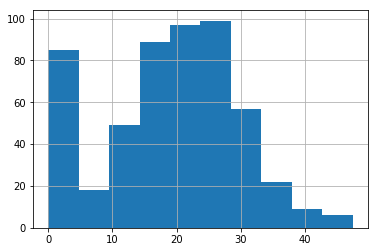

In [57]:
df.loc[df['ppctchg_0016']>0]['income_below_rent_cnt'].hist()

In [58]:
results = smf.ols('renter_cost_burden_diff ~ ppctchg_0016 + np.log(pop00) + income_below_rent_cnt + med_renter_inc_00', data=df).fit()
print results.summary()

                               OLS Regression Results                              
Dep. Variable:     renter_cost_burden_diff   R-squared:                       0.503
Model:                                 OLS   Adj. R-squared:                  0.500
Method:                      Least Squares   F-statistic:                     162.0
Date:                     Wed, 06 Feb 2019   Prob (F-statistic):           9.39e-96
Time:                             12:05:03   Log-Likelihood:                -1688.1
No. Observations:                      646   AIC:                             3386.
Df Residuals:                          641   BIC:                             3409.
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [69]:
# piecewise pop change
df['piece_loss'] = 0
df.loc[df['ppctchg_0016']<0, 'piece_loss']  = df['ppctchg_0016']
df['piece_growth'] = 0
df.loc[df['ppctchg_0016']>0, 'piece_growth'] = df['ppctchg_0016']
results = smf.ols('income_below_rent_cnt ~ ppctchg_0016 + np.log(pop00) + med_renter_inc_00 + C(state)', data=df).fit()
print results.summary()

                              OLS Regression Results                             
Dep. Variable:     income_below_rent_cnt   R-squared:                       0.224
Model:                               OLS   Adj. R-squared:                  0.158
Method:                    Least Squares   F-statistic:                     3.426
Date:                   Wed, 06 Feb 2019   Prob (F-statistic):           6.76e-13
Time:                           12:32:52   Log-Likelihood:                -1985.1
No. Observations:                    646   AIC:                             4072.
Df Residuals:                        595   BIC:                             4300.
Df Model:                             50                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercep

In [63]:
df['income_below_rent_cnt'] = 0
df.loc[(df['inc_idx_chg'] > 0) & (df['inc_idx_chg'] < df['rent_idx_chg']), 'income_below_rent_cnt'] = np.abs(df['inc_idx_chg'] - df['rent_idx_chg'])
# df.loc[(df['inc_idx_chg'] > 0) & (df['inc_idx_chg'] < df['rent_idx_chg']), 'income_below_rent_cnt'] = 2
# df.loc[df['ppctchg_0016']<0]['income_below_rent_cnt'].hist()

results = smf.ols('income_below_rent_cnt ~ ppctchg_0016 + np.log(pop00) + med_renter_inc_00', data=df).fit()
print results.summary()

                              OLS Regression Results                             
Dep. Variable:     income_below_rent_cnt   R-squared:                       0.044
Model:                               OLS   Adj. R-squared:                  0.039
Method:                    Least Squares   F-statistic:                     9.805
Date:                   Wed, 06 Feb 2019   Prob (F-statistic):           2.49e-06
Time:                           12:13:04   Log-Likelihood:                -2052.4
No. Observations:                    646   AIC:                             4113.
Df Residuals:                        642   BIC:                             4131.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercep